# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     906.9
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           6.53e-41
Time:                        15:57:29   Log-Likelihood:              -0.022207
No. Observations:                  50   AIC:                             8.044
Df Residuals:                      46   BIC:                             15.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9065      0.086     57.037      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.38369086  4.88119611  5.33769457  5.72473937  6.02414997  6.23099918
  6.35442264  6.41611792  6.44677961  6.48105633  6.55185804  6.68494903
  6.89471492  7.18179915  7.53299725  7.92342632  8.32061318  8.68982968
  8.99979838  9.22783138  9.36355786  9.41062799  9.38611322  9.31770145
  9.23914804  9.18472987  9.18361376  9.25506441  9.40527933  9.62637052
  9.89766053 10.18907966 10.46610632 10.69543887 10.85046693 10.91564345
 10.88903901 10.78265881 10.62047027 10.43446527 10.25940392 10.12710362
 10.06121151 10.07331937 10.16105907 10.30849167 10.48872612 10.66833744
 10.81285828 10.89244185]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.87269709 10.71510584 10.44013774 10.09444056  9.73941916  9.43620144
  9.23067213  9.14223859  9.15907917  9.24103765]


## Plot comparison

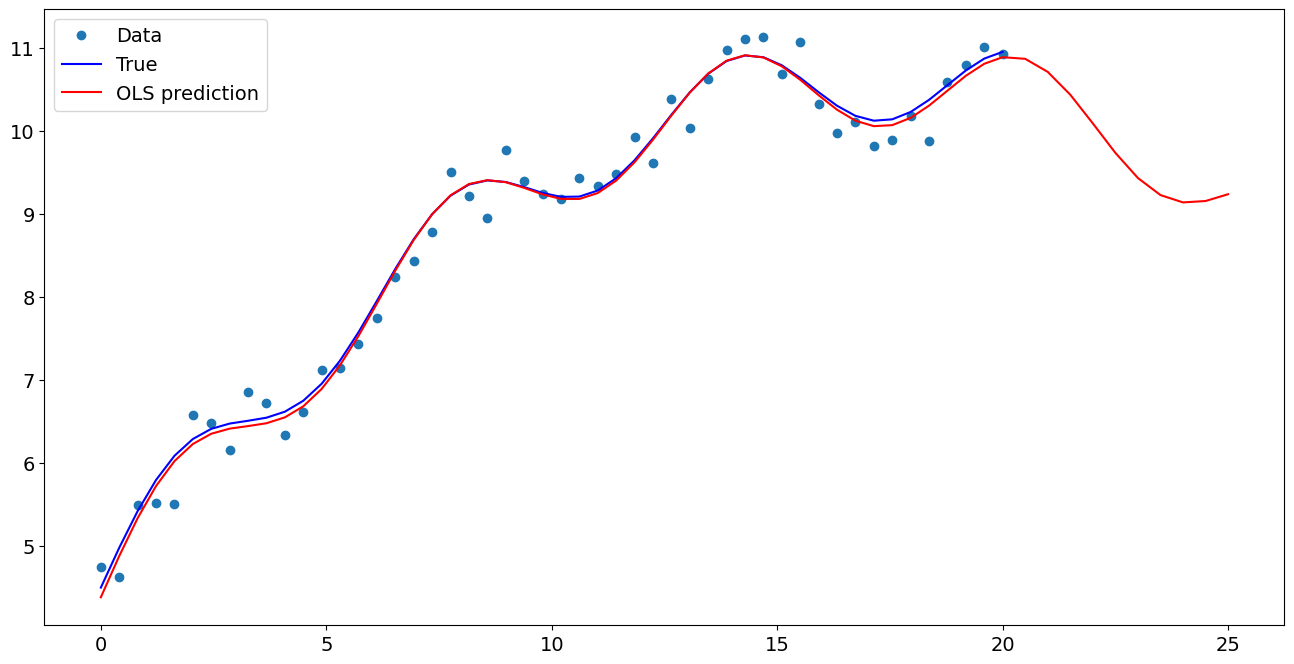

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.906460
x1                  0.510719
np.sin(x1)          0.521969
I((x1 - 5) ** 2)   -0.020911
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.872697
1    10.715106
2    10.440138
3    10.094441
4     9.739419
5     9.436201
6     9.230672
7     9.142239
8     9.159079
9     9.241038
dtype: float64